# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.213711e+01     1.445182e+01
 * time: 0.003056049346923828
     1     6.476434e+01     1.063904e+01
 * time: 0.009303092956542969
     2     5.922706e+01     1.520632e+01
 * time: 0.02283191680908203
     3     4.232887e+01     1.008649e+01
 * time: 0.04101705551147461
     4     3.165956e+01     8.433190e+00
 * time: 0.059565067291259766
     5     2.372372e+01     5.983930e+00
 * time: 0.07554292678833008
     6     2.079007e+01     5.973274e+00
 * time: 0.15797710418701172
     7     1.064214e+01     2.531650e+00
 * time: 0.17158198356628418
     8     9.439508e+00     2.659705e+00
 * time: 0.184906005859375
     9     8.799953e+00     2.233042e+00
 * time: 0.19839096069335938
    10     8.616953e+00     4.066396e+00
 * time: 0.2091219425201416
    11     8.320228e+00     1.858970e+00
 * time: 0.22004199028015137
    12     7.994988e+00     2.428314e+00
 * time: 0.2304069995880127
    13     7.874427e+00     3.489153e+00
 * time: 

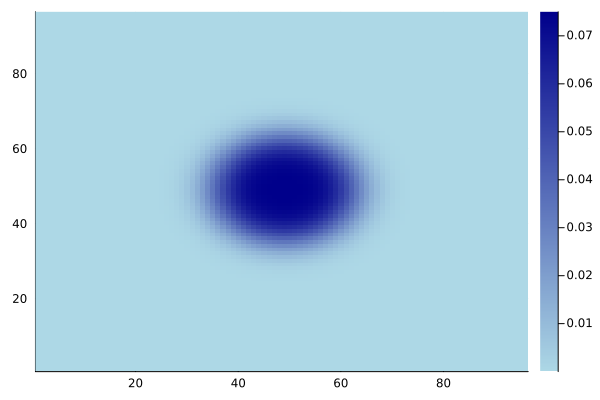

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)